In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10,10)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('/content/Banking.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Other attributes :

Campaign :- The number of contacts performed during the current marketing campaign for this customer.

Pdays :- the number of days that passed by after the customer was last contacted from a previous campaign. some value is -1 if the client was not contacted previously.

Previous :- Number of times this client was contacted before this campaign.

Poutcome :-The outcome of the previous marketing campaign for this customer.

Deposit(y) :- Whether the customer has subscribed to a term deposit Yes or No. (the target variable)

In [3]:
# Check first 5 rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
 #check last rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Note: In the given dataset there are 7 numerical and 10 categorical features are present.

In [6]:
# finding out how many rows and columns in our dataset

data.shape

(45211, 17)

In [7]:
# check the duplicate rows

data.duplicated().sum()

0

In [8]:
#check null value

data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
# check the missing values (NaN values)

data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Note :-

The pdays column includes values of -1, which shows that certain customers were not contacted previously as part of the bank's marketing campaign.

The dataset includes a large number of new customers, as showcased by the prevalence of 0 values in column previous, which suggest that many customers have not previously been contacted before this campaign.

The balance column contains some negativevalues, which could indicate that certain customers have overdrawn on their accounts or have outstanding debts.

In [11]:
# Drop column'duration'
data = data.drop('duration',axis=1)

print("shape of dataset: ",data.shape)

data.head()

shape of dataset:  (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


Note:

Duration Column is dropped
Now shape of the dataset is 45211 rows and 16 columns


In [ ]:
#HISTOGRAM
# This Histrogram shows the graphical representation of the numerical values


<Axes: xlabel='previous', ylabel='Count'>

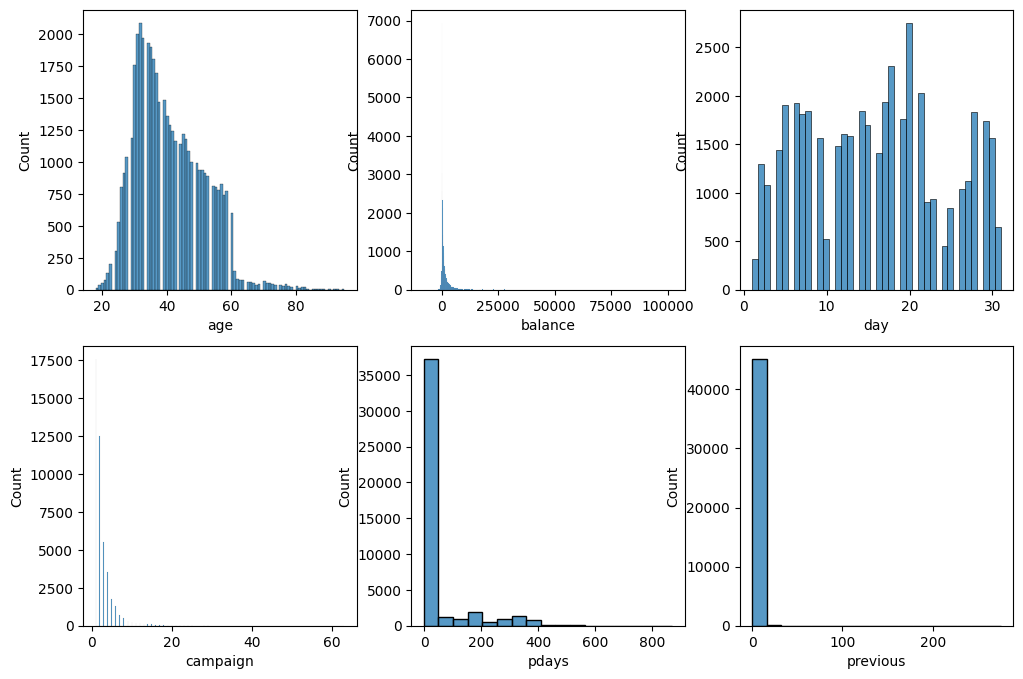

In [12]:
fig,axes = plt.subplots(2,3,figsize=(12, 8))
sns.histplot(data=data, x = 'age', ax = axes[0,0])
sns.histplot(data=data, x = 'balance', ax = axes[0,1])
sns.histplot(data=data, x = 'day', ax = axes[0,2])
sns.histplot(data=data, x = 'campaign', ax = axes[1,0])
sns.histplot(data=data, x = 'pdays', ax = axes[1,1])
sns.histplot(data=data, x = 'previous', ax = axes[1,2])

In [ ]:
#Distribution plot

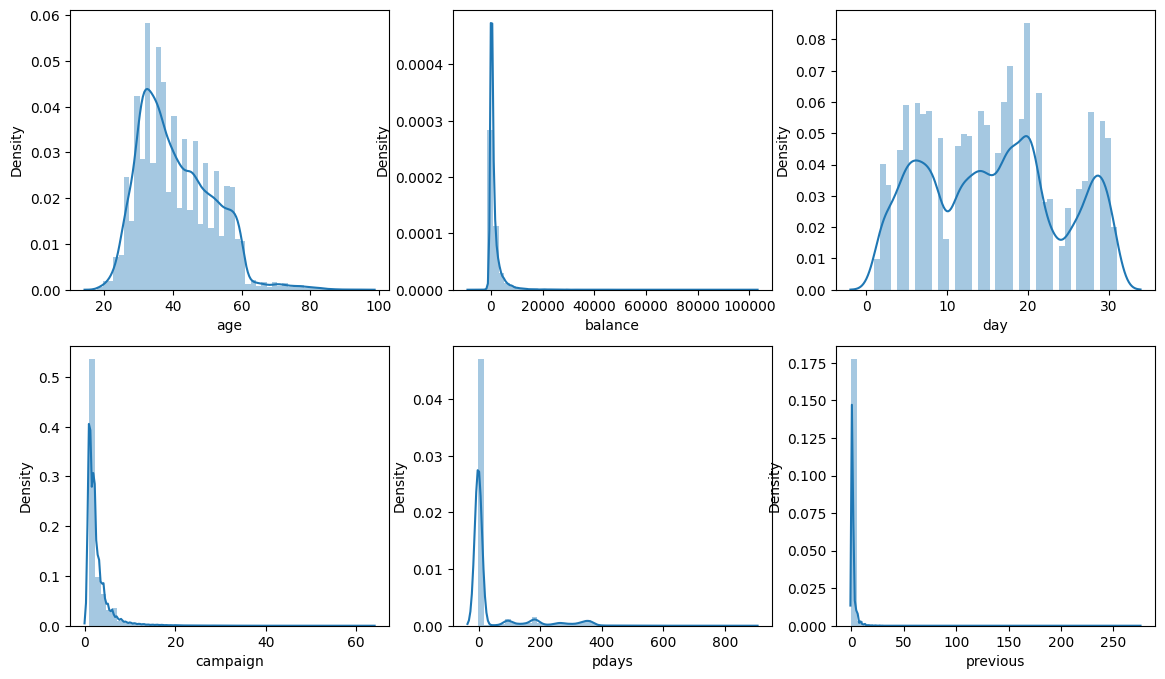

In [13]:
from pylab import *

figure(figsize=(14, 8))

subplot(2, 3, 1)
sns.distplot(data['age'])

subplot(2, 3, 2)
sns.distplot(data['balance'])

subplot(2, 3, 3)
sns.distplot(data['day'])

subplot(2, 3, 4)
sns.distplot(data['campaign'])

subplot(2, 3, 5)
sns.distplot(data['pdays'])

subplot(2, 3, 6)
sns.distplot(data['previous'])

show()

observations :-

The numerical columns 'age', 'balance', and 'duration' are right skewed, indicating that there may be some outliers present in the data. they are far away from the normal range of values and can significantly affect the analysis

As per the histogram, there are some customers who are above 65+ years of age and have been contacted for term deposit. This may not be a sensible strategy as these customers may not have a long enough investment horizon to benefit from the term deposit. we have to analysis of old age customers subscribed and non-subscribed ratio.

<Axes: xlabel='previous'>

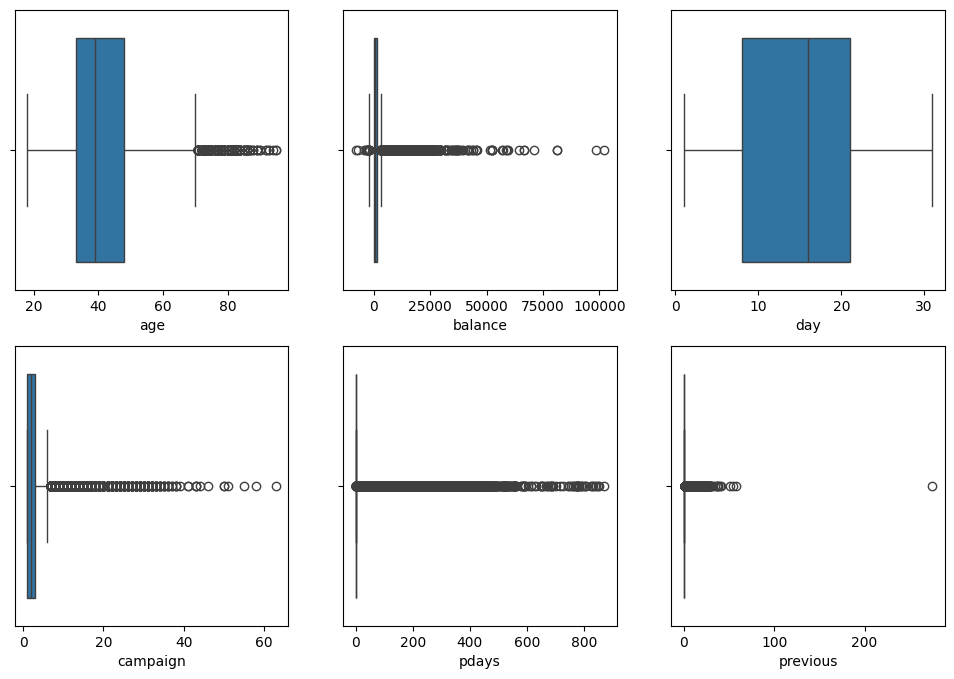

In [14]:
# defining plotting region(2 rows,2 columns)

fig,axes = plt.subplots(2,3,figsize=(12, 8))

#create boxplot in each subplot
sns.boxplot(data=data,x = 'age',ax = axes[0,0])
sns.boxplot(data=data, x = 'balance', ax = axes[0,1])
sns.boxplot(data=data, x = 'day', ax = axes[0,2])
sns.boxplot(data=data, x = 'campaign', ax = axes[1,0])
sns.boxplot(data=data, x = 'pdays', ax = axes[1,1])
sns.boxplot(data=data, x = 'previous', ax = axes[1,2])

y
no     39922
yes     5289
Name: count, dtype: int64


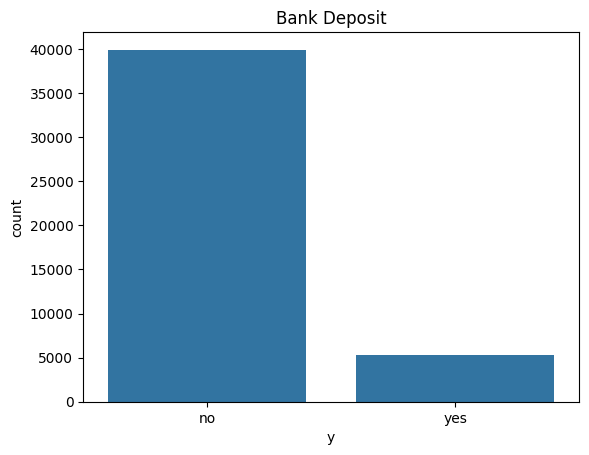

In [15]:
print(data.y.value_counts())
axes1 = sns.countplot(x='y',data=data)
plt.title("Bank Deposit");

Note:

Bank Deposit product subscribed by 5289 people out of 45211 people.
Bank Deposit product not subscribed by 39922 people out of 45211 people.
Non subscribed count is greater than the subscribed count, so , this dataset is imbalanced data.

[ ]


In [16]:
#  check the columns presents in the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [17]:
# Check the datatypes of the columns

data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


Numerical Columns: age, balance, day, campaign, pdays, previous

Categorical Columns: job, martial, education, default, housing, loan, contact, month, potcome, y

In [ ]:
#Correlation plot

In [23]:
df_numerical = data.select_dtypes(include=[int, float])

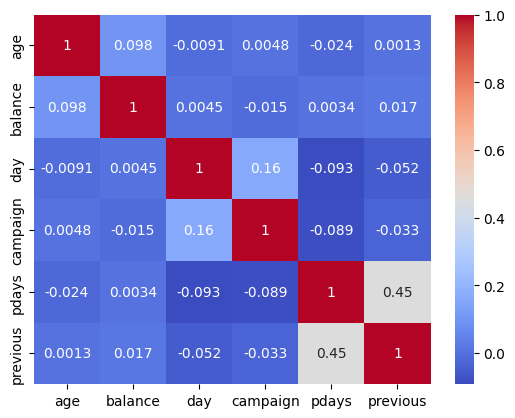

In [24]:
# Check if there are any numerical columns
if df_numerical.empty:
    print("No numerical columns in the DataFrame.")
else:
    # Step 2: Create the Correlation Matrix
    corr_matrix = df_numerical.corr()

    # Step 3: Plot the Correlation Matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

In [25]:
#standardization of dataset

from sklearn.preprocessing import StandardScaler

# copy original dataframe in to data_num
data_num =data.copy()

scalar = StandardScaler()
num_cols = ['age','balance','day','campaign','pdays','previous']
data_num[num_cols] = scalar.fit_transform(data_num[num_cols])
data_num = data_num.drop(['job','marital' ,'education','default','housing','loan','contact','month','poutcome','y'],axis=1)
data_num.head()

,age,balance,day,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194


Note: the data_num DataFrame contains the standardized values for the specified numerical columns. Standardization ensures that these columns have zero mean and unit variance, making them comparable and suitable for certain machine learning algorithms that are sensitive to the scale of input features

In [26]:
# Encode Categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

#copy original dataframe in to data_num
data_targ = data.copy()

#drop all the features and keep target y
data_targ = data_targ.drop(['age','job','marital','education','default','balance','housing','loan','contact','day','month','campaign','pdays','previous','poutcome'],axis=1)


# encode target value yes to 1 and no to 0
#data_targ['y']= data_targ['y'].apply(lambda x:1 if x== 'yes' else 0)

data_targ.head(15)

,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [27]:
# Encode Categorical features

#onehotencoder method isused to categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols =['job','marital' ,'education','default','housing','loan','contact','month','poutcome']


# copy original dataframe into data_cat
data_cat=data.copy()
data_cat.head()

# encode categorical data into numerical

data_encoded= pd.DataFrame(encoder.fit_transform(data_cat[cat_cols]))
data_encoded.columns = encoder.get_feature_names_out(cat_cols)


#Replace categorical data with encoded data
data_cat = data_cat.drop(cat_cols,axis=1)
data_cat = pd.concat([data_num,data_encoded,data_cat],axis=1)


print("shape of dataframe: ",data_cat.shape)

data_cat.head()



shape of dataframe:  (45211, 57)


,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,y
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,58,2143,5,1,-1,0,no
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,44,29,5,1,-1,0,no
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,33,2,5,1,-1,0,no
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,47,1506,5,1,-1,0,no
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33,1,5,1,-1,0,no


In [29]:
# Select Features
feature=data_cat.drop('y',axis=1)

#select Target
target = data_cat['y']

#set training and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature,target,shuffle= True,test_size=0.2,random_state = 42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 56)
(9043, 56)
(36168,)
(9043,)


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, pos_label):
    y_pred = model.predict(X_test)

    # Encode labels to 0 and 1
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.transform(y_pred)

    acc = accuracy_score(y_test_encoded, y_pred_encoded)
    prec = precision_score(y_test_encoded, y_pred_encoded, pos_label=label_encoder.transform([pos_label])[0])
    rec = recall_score(y_test_encoded, y_pred_encoded, pos_label=label_encoder.transform([pos_label])[0])
    f1 = f1_score(y_test_encoded, y_pred_encoded, pos_label=label_encoder.transform([pos_label])[0])

    # Check if the model has predict_proba attribute
    if hasattr(model, 'predict_proba'):
        auc = roc_auc_score(y_test_encoded, model.predict_proba(X_test)[:, 1])
        fpr, tpr, _ = roc_curve(y_test_encoded, model.predict_proba(X_test)[:, 1])
    else:
        auc = None  # AUC not available for models without predict_proba

    con_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

    # Visualization of Confusion matrix
    plt.figure(figsize=(3, 3))
    sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc, 'con_matrix': con_matrix}



In [ ]:
#This function provides a comprehensive evaluation of a binary classification model and facilitates visual inspection of its performance through the confusion matrix heatmap.



DECISION TREE CLASSIFIER

In [32]:

#Decision Tree Model
from sklearn import tree

# Building Decision tree Model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

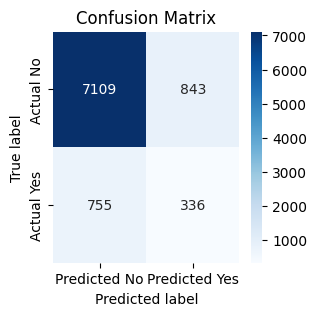

======================Decision Tree==============
Accuracy: 0.8232887316156143
Precision: 0.28498727735368956
Recall:  0.307974335472044
F1_score 0.2960352422907489
Area Under Curve: 0.6009816345368268
Confusion Matrix:
 [[7109  843]
 [ 755  336]]


In [33]:
# Assuming 'yes' is the positive class
dtc_eval = evaluate_model(dtc, X_test, y_test, pos_label='yes')

# Print results
print("======================Decision Tree==============")
print("Accuracy:", dtc_eval['acc'])
print("Precision:", dtc_eval['prec'])
print("Recall: ", dtc_eval['rec'])
print("F1_score", dtc_eval['f1'])
if dtc_eval['auc'] is not None:
    print("Area Under Curve:", dtc_eval['auc'])
print("Confusion Matrix:\n", dtc_eval['con_matrix'])

LOGISTIC REGRESSION

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

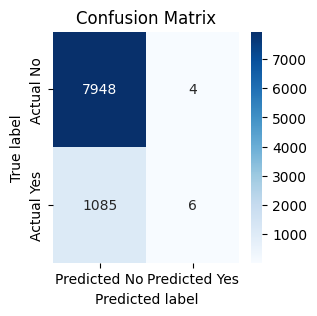

======================Logistic Regression==============
Accuracy: 0.8795753621585757
Precision: 0.6
Recall:  0.005499541704857928
F1_score 0.010899182561307902
Area Under Curve: 0.7051647649416204
Confusion Matrix:
 [[7948    4]
 [1085    6]]


In [35]:
# Assuming 'yes' is the positive class
lr_eval = evaluate_model(logreg, X_test, y_test, pos_label='yes')

# Print results
print("======================Logistic Regression==============")
print("Accuracy:", lr_eval['acc'])
print("Precision:", lr_eval['prec'])
print("Recall: ", lr_eval['rec'])
print("F1_score", lr_eval['f1'])
if lr_eval['auc'] is not None:
    print("Area Under Curve:", lr_eval['auc'])
print("Confusion Matrix:\n", lr_eval['con_matrix'])


RANDOM FOREST

In [36]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

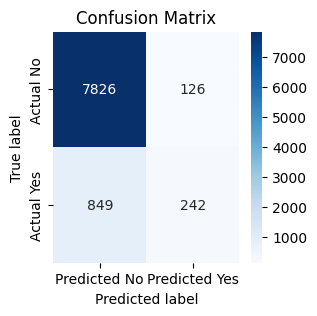

======================Random Forest==============
Accuracy: 0.8921817980758597
Precision: 0.657608695652174
Recall:  0.22181484876260313
F1_score 0.3317340644276902
Area Under Curve: 0.7810698402145229
Confusion Matrix:
 [[7826  126]
 [ 849  242]]


In [37]:
# Assuming 'yes' is the positive class
rfc_eval = evaluate_model(rfc, X_test, y_test, pos_label='yes')

# Print results
print("======================Random Forest==============")
print("Accuracy:", rfc_eval['acc'])
print("Precision:", rfc_eval['prec'])
print("Recall: ", rfc_eval['rec'])
print("F1_score", rfc_eval['f1'])
if rfc_eval['auc'] is not None:
    print("Area Under Curve:", rfc_eval['auc'])
print("Confusion Matrix:\n", rfc_eval['con_matrix'])

NAIVE BAIYES

In [38]:
# naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

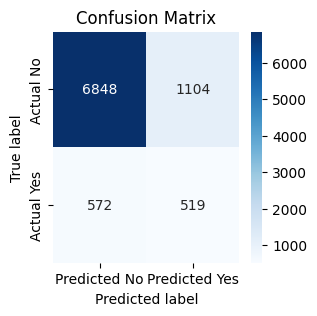

======================Naive Bayes==============
Accuracy: 0.814663275461683
Precision: 0.3197781885397412
Recall:  0.47571035747021084
F1_score 0.3824613117170228
Area Under Curve: 0.7381621880688347
Confusion Matrix:
 [[6848 1104]
 [ 572  519]]


In [39]:
# Assuming 'yes' is the positive class
nb_eval = evaluate_model(nb, X_test, y_test, pos_label='yes')

# Print results
print("======================Naive Bayes==============")
print("Accuracy:", nb_eval['acc'])
print("Precision:", nb_eval['prec'])
print("Recall: ", nb_eval['rec'])
print("F1_score", nb_eval['f1'])
if nb_eval['auc'] is not None:
    print("Area Under Curve:", nb_eval['auc'])
print("Confusion Matrix:\n", nb_eval['con_matrix'])

KNN CLASSIFIER

In [40]:
# Knn Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

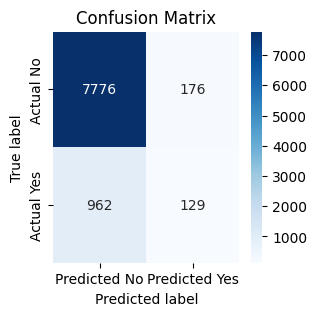

======================K-Nearest Neighbour==============
Accuracy: 0.8741568063695676
Precision: 0.42295081967213116
Recall:  0.11824014665444546
F1_score 0.1848137535816619
Area Under Curve: 0.6157770407965667
Confusion Matrix:
 [[7776  176]
 [ 962  129]]


In [41]:
# Assuming 'yes' is the positive class
knn_eval = evaluate_model(knn, X_test, y_test, pos_label='yes')

# Print results
print("======================K-Nearest Neighbour==============")
print("Accuracy:", knn_eval['acc'])
print("Precision:", knn_eval['prec'])
print("Recall: ", knn_eval['rec'])
print("F1_score", knn_eval['f1'])
if knn_eval['auc'] is not None:
    print("Area Under Curve:", knn_eval['auc'])
print("Confusion Matrix:\n", knn_eval['con_matrix'])

MODEL COMPARISON

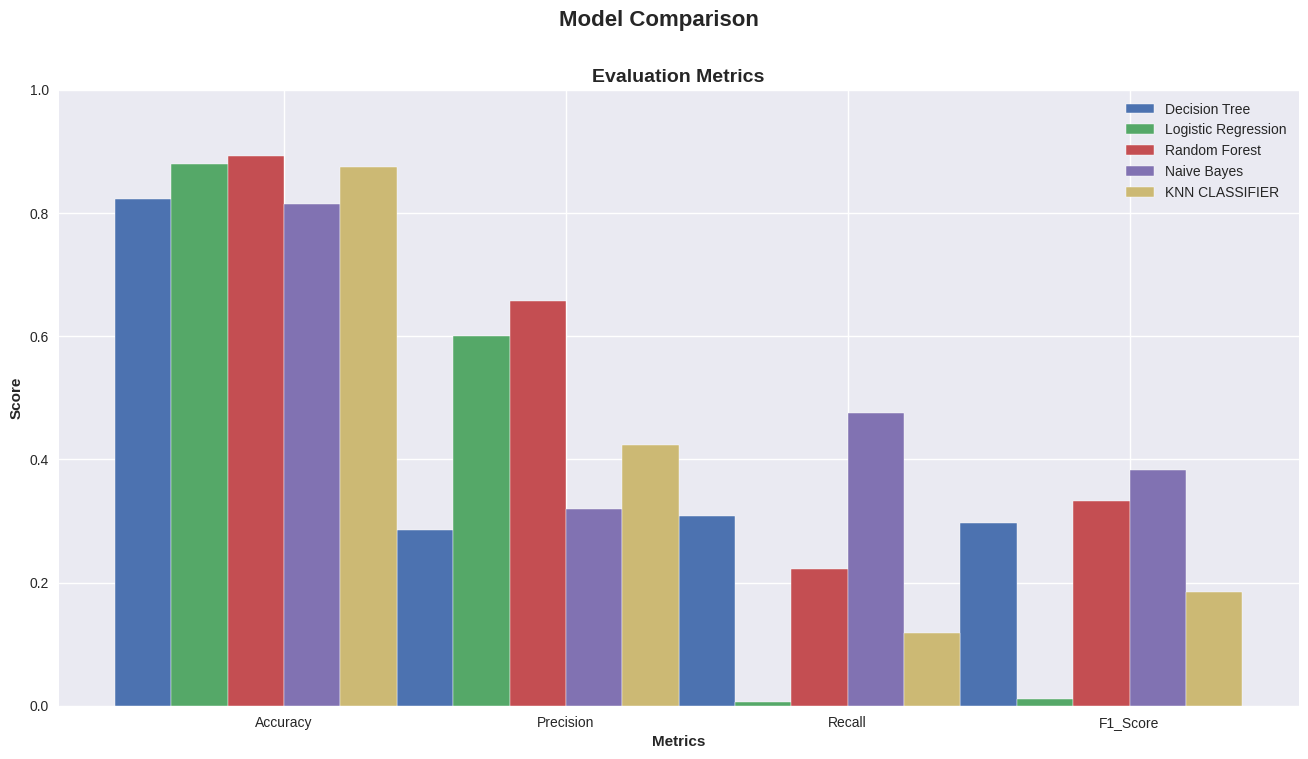

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Assume dtc_eval, lr_eval, rfc_eval, nb_eval, knn_eval are dictionaries containing evaluation metrics

# Initialize figure with two plots
fig1, ax1 = plt.subplots()
fig1.suptitle("Model Comparison", fontsize=16, fontweight='bold')
fig1.set_figheight(8)
fig1.set_figwidth(16)
fig1.set_facecolor("white")

# First Plot
barwidth = 0.2
dtc_score = (dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'])
lr_score = (lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'])
rfc_score = (rfc_eval['acc'], rfc_eval['prec'], rfc_eval['rec'], rfc_eval['f1'])
nb_score = (nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'])
knn_score = (knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'])

# Set Position on x axis
r1 = np.arange(len(dtc_score))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
r4 = [x + barwidth for x in r3]
r5 = [x + barwidth for x in r4]

# Make a plot
ax1.bar(r1, dtc_score, width=barwidth, edgecolor='White', label='Decision Tree')
ax1.bar(r2, lr_score, width=barwidth, edgecolor='White', label='Logistic Regression')
ax1.bar(r3, rfc_score, width=barwidth, edgecolor='White', label='Random Forest')
ax1.bar(r4, nb_score, width=barwidth, edgecolor='White', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barwidth, edgecolor='White', label='KNN CLASSIFIER')

# Configure X and Y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
ax1.set_xticks([r + barwidth*2.5 for r in range(len(dtc_score))])
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

# create Legends and titles
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()




# Display the plot
plt.show()




Note: According to above model comparison random forest classifier gives best accuracy value 0.89 than other models.

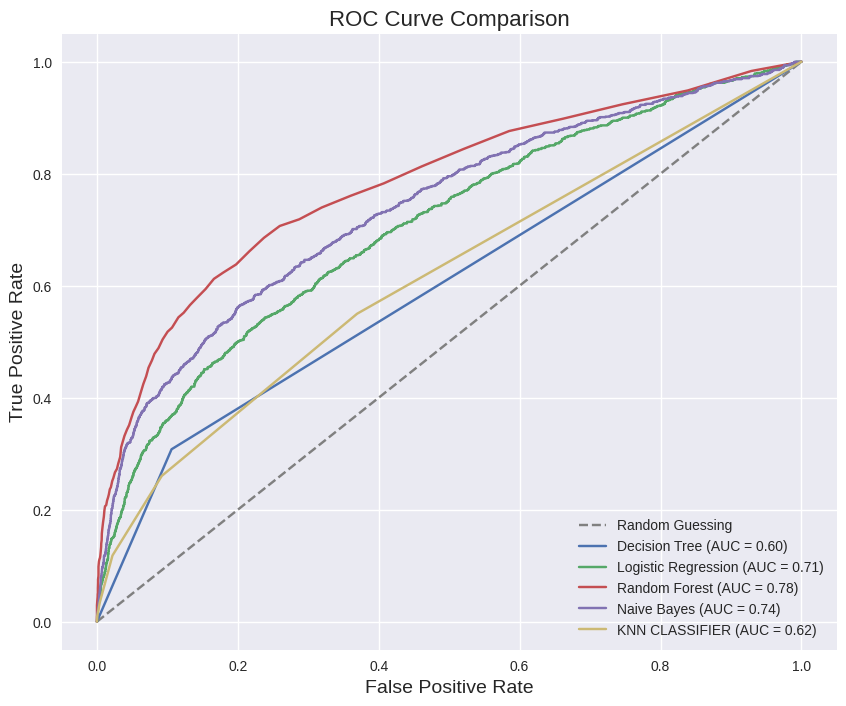

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode labels to 0 and 1
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Assuming dtc, lr, rfc, nb, knn are the trained models
models = [dtc, logreg, rfc, nb, knn]
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'KNN CLASSIFIER']

# Initialize figure
plt.figure(figsize=(10, 8))
plt.title('ROC Curve Comparison', fontsize=16)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Plot ROC curves for each model
for model, name in zip(models, model_names):
    fpr, tpr, _ = roc_curve(y_test_encoded, model.predict_proba(X_test)[:, 1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Configure X and Y axis
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In this case, "Random Forest" has the highest AUC score (0.78) and is considered the model with the best performance for the given dataset and evaluation criteria.

HYPERPARAMETER TUNING

In [48]:
from sklearn.model_selection import GridSearchCV


In [49]:
# Decision Tree hyperparameter tuning
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc_grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), dtc_param_grid, cv=5)
dtc_grid_search.fit(X_train, y_train)
best_dtc_model = dtc_grid_search.best_estimator_

In [50]:
print("======================Decision Tree Hyperparameters==============")
print(dtc_grid_search.best_estimator_,"\n\n")

======================Decision Tree Hyperparameters==============
DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=0,
                       splitter='random') 




In [51]:
# Logistic Regression hyperparameter tuning
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

In [52]:
print("======================Logistic Regression Hyperparameters==============")
print(lr_grid_search.best_estimator_, "\n\n")


======================Logistic Regression Hyperparameters==============
LogisticRegression(C=0.1, penalty='l1', solver='liblinear') 




In [61]:
from sklearn.model_selection import RandomizedSearchCV

rfc_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                                       rfc_param_grid,
                                       n_iter=50,  # Number of random combinations to try
                                       cv=5,
                                       random_state=0)
rfc_random_search.fit(X_train, y_train)
best_rfc_model = rfc_random_search.best_estimator_



In [62]:
print("======================Random Forest Hyperparameters==============")
print(rfc_random_search.best_estimator_, "\n\n")

======================Random Forest Hyperparameters==============
RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50, random_state=0) 




In [56]:
# Naive Bayes does not have many hyperparameters to tune
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Naive Bayes hyperparameter tuning
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)
best_nb_model = nb_grid_search.best_estimator_

In [57]:
print("======================Naive Bayes Hyperparameters==============")
print(nb_grid_search.best_estimator_, "\n\n")

======================Naive Bayes Hyperparameters==============
GaussianNB(var_smoothing=1) 




In [58]:
# K-Nearest Neighbors hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_

In [59]:
print("======================K-Nearest Neighbors Hyperparameters==============")
print(knn_grid_search.best_estimator_, "\n\n")


======================K-Nearest Neighbors Hyperparameters==============
KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance') 




It performs a grid search cross-validation to find the best hyperparameters for different classification models .

First, the grid search cross-validation parameters are defined for each model. These parameters include the maximum number of tree leaf nodes, the minimum number of samples required to split an internal node, and the minimum number of samples required to be at a leaf node.

The GridSearchCV function is then used to perform the grid search cross-validation. This function fits the models to the training data, evaluates the model's performance using the specified parameters and scoring function, and finds the parameters that give the best score.

After performing the grid search cross-validation, the best model for each algorithm is printed out.

Finally, the performance of each algorithm is evaluated on the test dataset and compared.

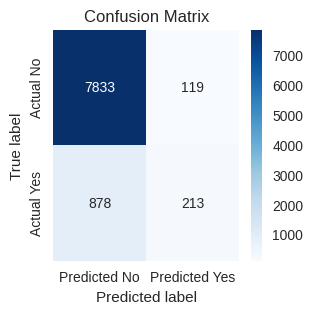

======================Best Decision Tree==============
Accuracy: 0.8897489771093664
Precision: 0.641566265060241
Recall: 0.19523373052245646
F1_score: 0.2993675333801827
Area Under Curve: 0.7323407101638243
Confusion Matrix:
 [[7833  119]
 [ 878  213]] 





In [63]:
# Assuming you have the best models from hyperparameter tuning

# Evaluate best Decision Tree model
dtc_eval_best = evaluate_model(best_dtc_model, X_test, y_test, pos_label='yes')
print("======================Best Decision Tree==============")
print("Accuracy:", dtc_eval_best['acc'])
print("Precision:", dtc_eval_best['prec'])
print("Recall:", dtc_eval_best['rec'])
print("F1_score:", dtc_eval_best['f1'])
if dtc_eval_best['auc'] is not None:
    print("Area Under Curve:", dtc_eval_best['auc'])
print("Confusion Matrix:\n", dtc_eval_best['con_matrix'],"\n\n\n")

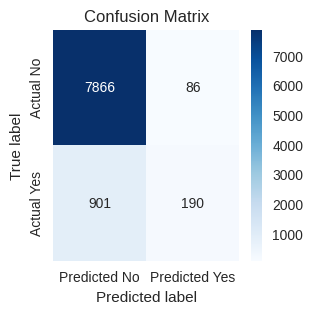

======================Best Logistic Regression==============
Accuracy: 0.8908548048214088
Precision: 0.6884057971014492
Recall: 0.17415215398716774
F1_score: 0.2779809802487198
Area Under Curve: 0.7573442488109223
Confusion Matrix:
 [[7866   86]
 [ 901  190]] 





In [64]:
# Evaluate best Logistic Regression model
lr_eval_best = evaluate_model(best_lr_model, X_test, y_test, pos_label='yes')
print("======================Best Logistic Regression==============")
print("Accuracy:", lr_eval_best['acc'])
print("Precision:", lr_eval_best['prec'])
print("Recall:", lr_eval_best['rec'])
print("F1_score:", lr_eval_best['f1'])
if lr_eval_best['auc'] is not None:
    print("Area Under Curve:", lr_eval_best['auc'])
print("Confusion Matrix:\n", lr_eval_best['con_matrix'],"\n\n\n")

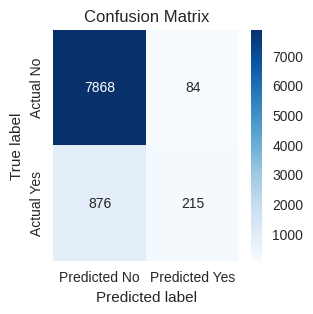

======================Best Random Forest==============
Accuracy: 0.8938405396439235
Precision: 0.7190635451505016
Recall: 0.19706691109074242
F1_score: 0.30935251798561153
Area Under Curve: 0.7930984163459216
Confusion Matrix:
 [[7868   84]
 [ 876  215]] 





In [65]:
# Evaluate best Random Forest model
rfc_eval_best = evaluate_model(best_rfc_model, X_test, y_test, pos_label='yes')
print("======================Best Random Forest==============")
print("Accuracy:", rfc_eval_best['acc'])
print("Precision:", rfc_eval_best['prec'])
print("Recall:", rfc_eval_best['rec'])
print("F1_score:", rfc_eval_best['f1'])
if rfc_eval_best['auc'] is not None:
    print("Area Under Curve:", rfc_eval_best['auc'])
print("Confusion Matrix:\n", rfc_eval_best['con_matrix'],"\n\n\n")


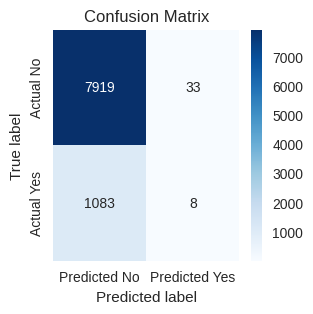

======================Best Naive Bayes==============
Accuracy: 0.876589627336061
Precision: 0.1951219512195122
Recall: 0.007332722273143905
F1_score: 0.014134275618374558
Area Under Curve: 0.6007351395264344
Confusion Matrix:
 [[7919   33]
 [1083    8]] 





In [66]:
# Evaluate best Naive Bayes model
nb_eval_best = evaluate_model(best_nb_model, X_test, y_test, pos_label='yes')
print("======================Best Naive Bayes==============")
print("Accuracy:", nb_eval_best['acc'])
print("Precision:", nb_eval_best['prec'])
print("Recall:", nb_eval_best['rec'])
print("F1_score:", nb_eval_best['f1'])
if nb_eval_best['auc'] is not None:
    print("Area Under Curve:", nb_eval_best['auc'])
print("Confusion Matrix:\n", nb_eval_best['con_matrix'],"\n\n\n")

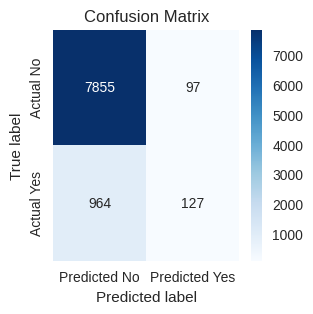

======================Best K-Nearest Neighbour==============
Accuracy: 0.8826716797522945
Precision: 0.5669642857142857
Recall: 0.11640696608615948
F1_score: 0.19315589353612167
Area Under Curve: 0.6492638807178542
Confusion Matrix:
 [[7855   97]
 [ 964  127]] 





In [67]:
# Evaluate best K-Nearest Neighbors model
knn_eval_best = evaluate_model(best_knn_model, X_test, y_test, pos_label='yes')
print("======================Best K-Nearest Neighbour==============")
print("Accuracy:", knn_eval_best['acc'])
print("Precision:", knn_eval_best['prec'])
print("Recall:", knn_eval_best['rec'])
print("F1_score:", knn_eval_best['f1'])
if knn_eval_best['auc'] is not None:
    print("Area Under Curve:", knn_eval_best['auc'])
print("Confusion Matrix:\n", knn_eval_best['con_matrix'],"\n\n\n")

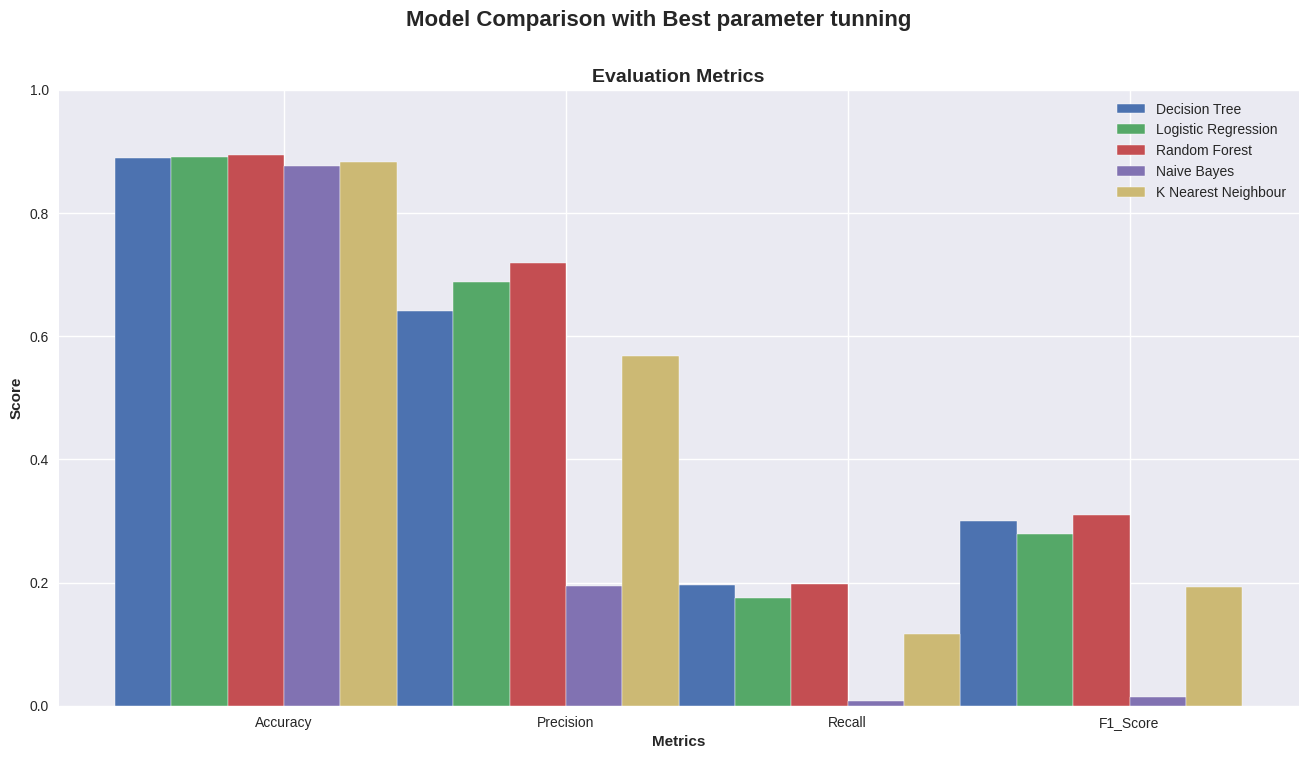

In [68]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Assume dtc_eval, lr_eval, rfc_eval, nb_eval, knn_eval are dictionaries containing evaluation metrics

# Initialize figure with two plots
fig3, ax3 = plt.subplots()
fig3.suptitle("Model Comparison with Best parameter tunning", fontsize=16, fontweight='bold')
fig3.set_figheight(8)
fig3.set_figwidth(16)
fig3.set_facecolor("white")

# First Plot
barwidth = 0.2
dtc_score_tunned = (dtc_eval_best['acc'], dtc_eval_best['prec'], dtc_eval_best['rec'], dtc_eval_best['f1'])
lr_score_tunned = (lr_eval_best['acc'], lr_eval_best['prec'], lr_eval_best['rec'], lr_eval_best['f1'])
rfc_score_tunned = (rfc_eval_best['acc'], rfc_eval_best['prec'], rfc_eval_best['rec'], rfc_eval_best['f1'])
nb_score_tunned = (nb_eval_best['acc'], nb_eval_best['prec'], nb_eval_best['rec'], nb_eval_best['f1'])
knn_score_tunned = (knn_eval_best['acc'], knn_eval_best['prec'], knn_eval_best['rec'], knn_eval_best['f1'])

# Set Position on x axis
r1 = np.arange(len(dtc_score))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
r4 = [x + barwidth for x in r3]
r5 = [x + barwidth for x in r4]

# Make a plot
ax3.bar(r1, dtc_score_tunned, width=barwidth, edgecolor='White', label='Decision Tree')
ax3.bar(r2, lr_score_tunned, width=barwidth, edgecolor='White', label='Logistic Regression')
ax3.bar(r3, rfc_score_tunned, width=barwidth, edgecolor='White', label='Random Forest')
ax3.bar(r4, nb_score_tunned, width=barwidth, edgecolor='White', label='Naive Bayes')
ax3.bar(r5, knn_score_tunned, width=barwidth, edgecolor='White', label='K Nearest Neighbour')

# Configure X and Y axis
ax3.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
ax3.set_xticks([r + barwidth*2.5 for r in range(len(dtc_score))])
ax3.set_xticklabels(labels)
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_ylim(0, 1)

# create Legends and titles
ax3.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax3.legend()



# Display the plot
plt.show()



Note: After hyperparameter tunning same random forest model performs better with accuracy (0.89) than other models.

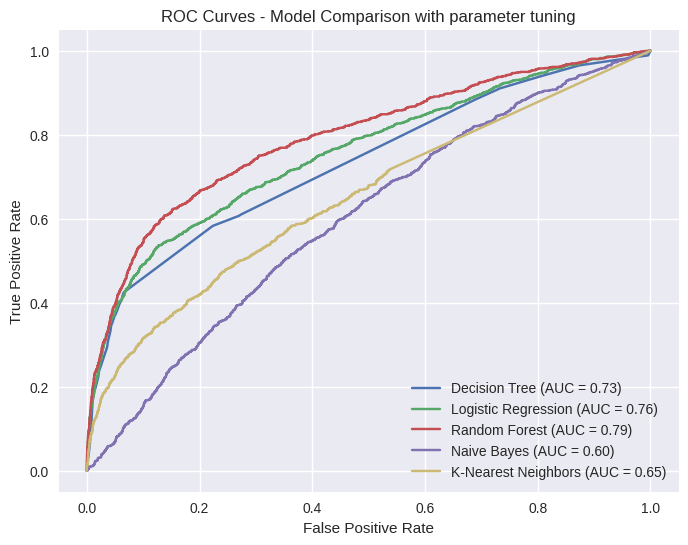

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Assuming you have fitted models with hyperparameter tuning
# best_dtc_model, best_lr_model, best_rfc_model, best_nb_model, best_knn_model

# Convert 'no' to 0 and 'yes' to 1 in y_test
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Create subplots for ROC curves
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Function to plot ROC curve
def plot_roc(model, X, y, ax, name):
    fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for Decision Tree
plot_roc(best_dtc_model, X_test, y_test_binary, ax=axs, name='Decision Tree')

# Plot ROC curve for Logistic Regression
plot_roc(best_lr_model, X_test, y_test_binary, ax=axs, name='Logistic Regression')

# Plot ROC curve for Random Forest
plot_roc(best_rfc_model, X_test, y_test_binary, ax=axs, name='Random Forest')

# Plot ROC curve for Naive Bayes
plot_roc(best_nb_model, X_test, y_test_binary, ax=axs, name='Naive Bayes')

# Plot ROC curve for K-Nearest Neighbors
plot_roc(best_knn_model, X_test, y_test_binary, ax=axs, name='K-Nearest Neighbors')

# Set labels and title
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('ROC Curves - Model Comparison with parameter tuning')

# Add a legend
axs.legend(loc='lower right')

# Show the plot
plt.show()

In this case, "Random Forest" has the highest AUC score (0.79) and is considered the model with the best performance for the given dataset and evaluation criteria.

Conclusion: After evaluating the performance of various machine learning algorithms on the given dataset, it was found that the Random Forest Classifier outperformed other algorithms such as Decision Tree, Logistic Regression,Naive Bayes, and KNN. The hyperparameters of the Random Forest Classifier were tuned using GridSearchCV to find the best combination of parameters for optimal performance.

